In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cameracalibration import camera_calibration,undistort
from binarization import binary_threshold
import cv2

In [43]:
def birdeyeview(img,verbose=False):
    h,w = img.shape[:2]
    source_point = np.float32([[w,h-10], #bottom right point
                               [0,h-10], #bottom left point
                               [546,460], #top left point
                               [732,460]]) #top right point
    destination_point = np.float32([[w,h], #bottom right point
                                  [0,h], #bottom left point
                                  [0,0], #top right point
                                  [w,0]]) #top right point
    presp_trans = cv2.getPerspectiveTransform(source_point,destination_point)
    rev_prep_trans = cv2.getPerspectiveTransform(destination_point,source_point)
    
    
    wrapped = cv2.warpPerspective(img,presp_trans,(w,h),flags = cv2.INTER_LINEAR)
#  flags – combination of interpolation methods 
# (INTER_LINEAR or INTER_NEAREST) and the optional 
# flag WARP_INVERSE_MAP, that sets M as the inverse 
# transformation ( \texttt{dst}\rightarrow\texttt{src} )

    if verbose:
        f = plt.figure(figsize=(100,35))
        ax1, ax2 = f.subplots(1, 2, sharex='col', sharey='row')
        f.set_facecolor('white')
        ax1.set_title('Before Prespective')
        ax1.imshow(img,cmap='gray')

        ax2.set_title('After prespective')
        ax2.imshow(wrapped,cmap='gray')




<Figure size 720x720 with 0 Axes>

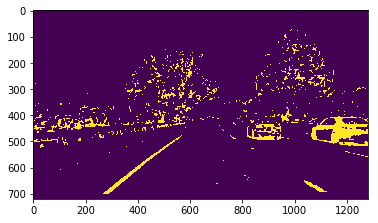

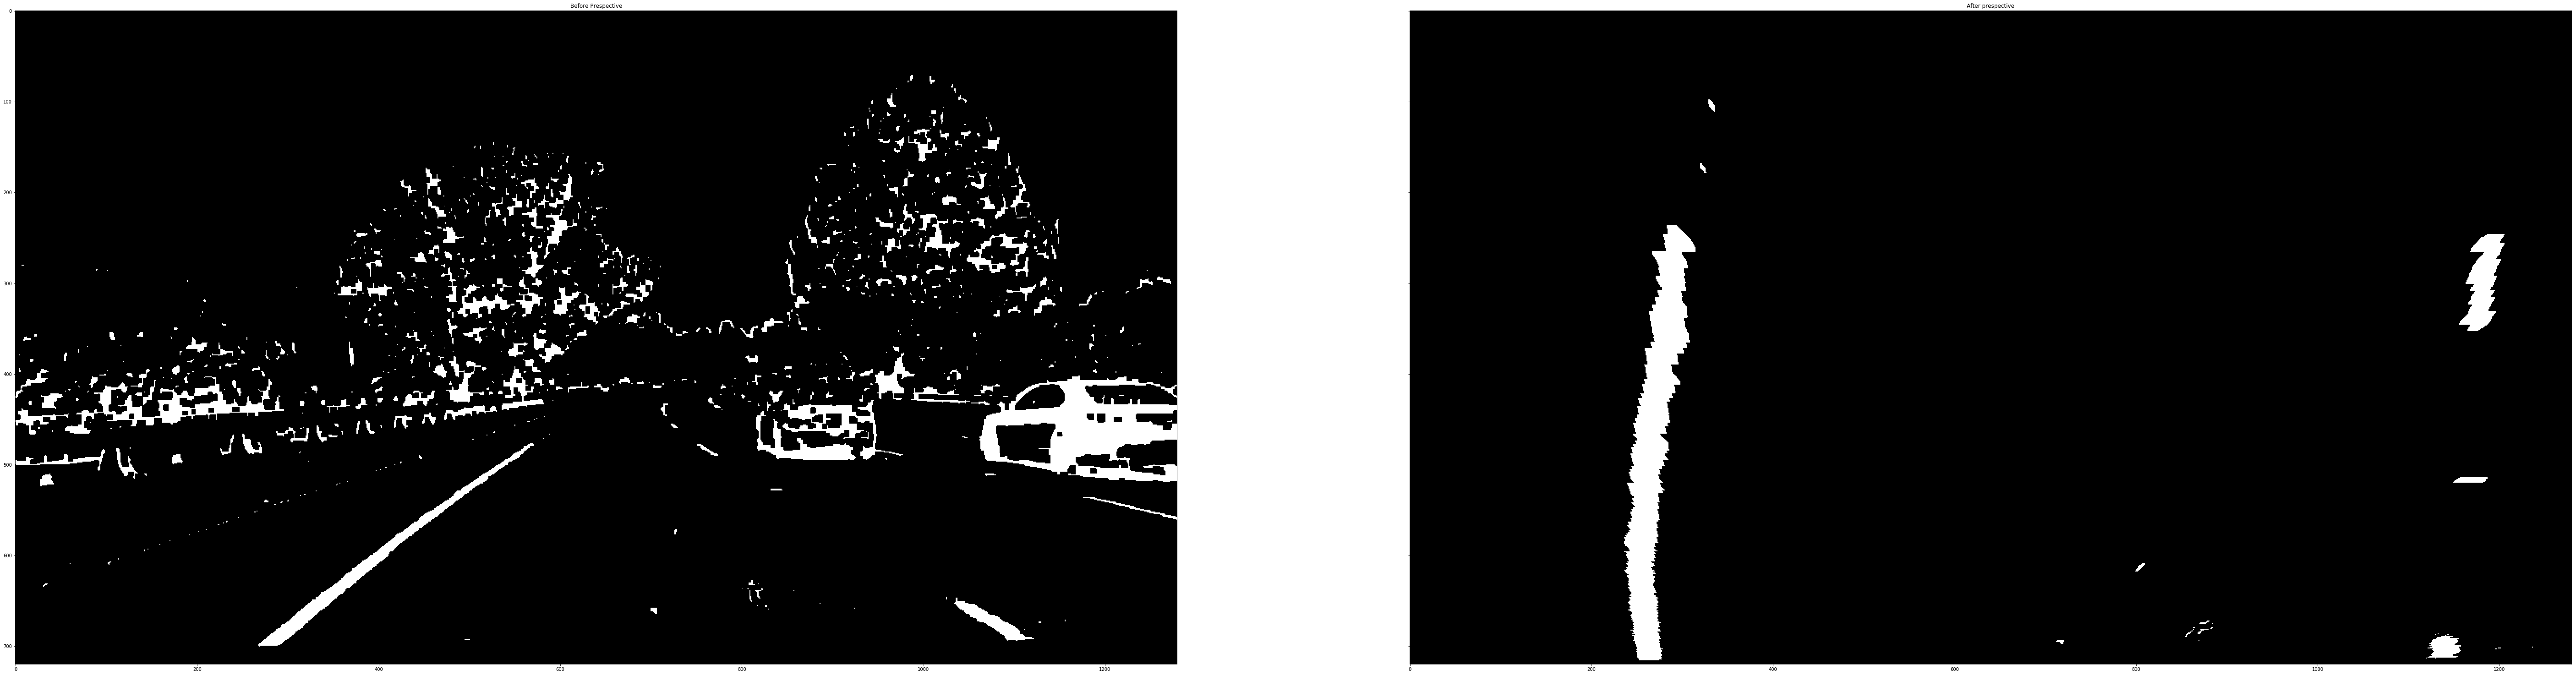

In [44]:
img = cv2.imread('test_images/test1.jpg')
ret, mtx, dist, rvecs, tvecs = camera_calibration()
# img_undis = undistort(img,mtx,dist,verbose=True)
img_bin = binary_threshold(img,verbose=False)
img_undis = undistort(img_bin,mtx,dist,verbose=True)
# img_rgb = cv2.cvtColor(img_undis,cv2.COLOR_BGR2RGB)
birdeyeview(img_undis,verbose=True)